<a href="https://colab.research.google.com/github/TALHAREYAZ/Python_Lab/blob/main/ML_ASSIGNMENT%2012022023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

mobile=pd.read_csv("/content/drive/MyDrive/ML DATA SET/train.csv")


In [ ]:
print(mobile.shape)

(2000, 21)


In [ ]:
print(mobile.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [ ]:
print(mobile.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [ ]:
print(mobile.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
print(mobile.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


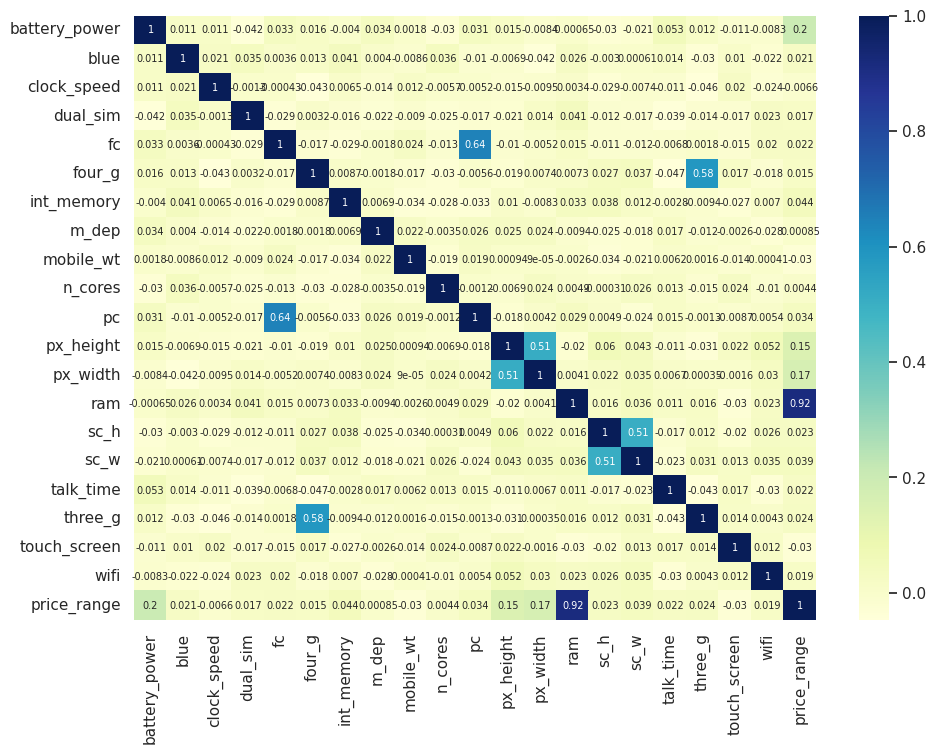

In [ ]:
plt.figure(figsize=(11,8),dpi=100)
sns.heatmap(mobile.corr(), cmap="YlGnBu",annot=True,annot_kws={'fontsize':7, 'fontweight':'normal'})

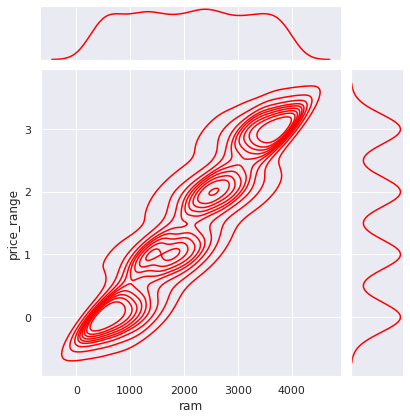

In [ ]:
sns.jointplot(x='ram',y='price_range',data=mobile,color='red',kind='kde');
plt.savefig('jointplot-ram.png')

AxesSubplot(0.125,0.125;0.775x0.755)


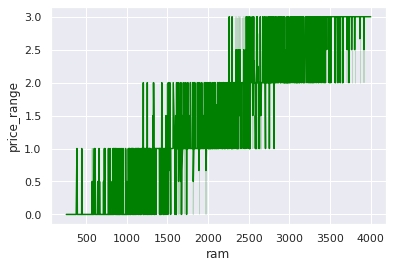

In [3]:
print(sns.lineplot(x='ram', y="price_range", color='green',data=mobile))

AxesSubplot(0.125,0.125;0.775x0.755)


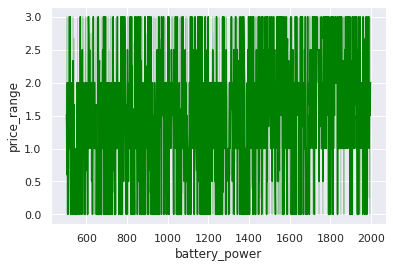

In [2]:
print(sns.lineplot(x='battery_power', y="price_range", color='green',data=mobile))

AxesSubplot(0.125,0.125;0.775x0.755)


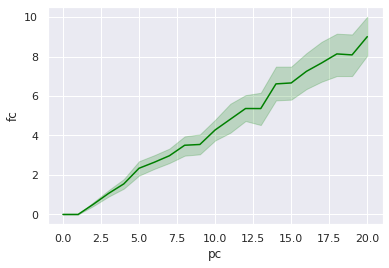

In [4]:
print(sns.lineplot(x='pc', y="fc", color='green',data=mobile))

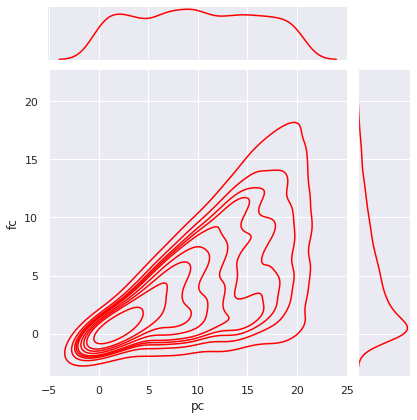

In [3]:
sns.jointplot(x='pc',y='fc',data=mobile,color='red',kind='kde');
plt.savefig('jointplot-wt.png')

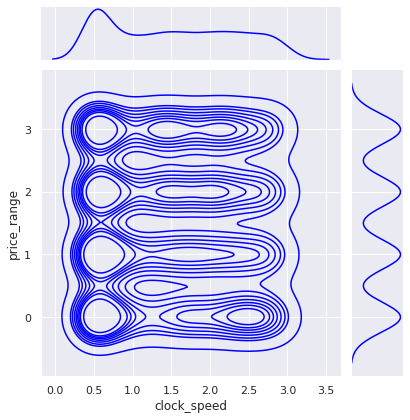

In [ ]:
sns.jointplot(x='clock_speed',y='price_range',data=mobile,color='blue',kind='kde');
plt.savefig('jointplot-cs.png')

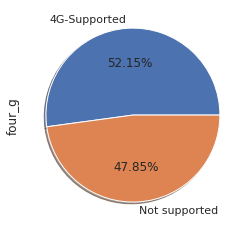

In [ ]:
mobile['four_g'].value_counts().plot(kind='pie',labels=['4G-Supported','Not supported'],autopct='%1.2f%%',shadow=True)


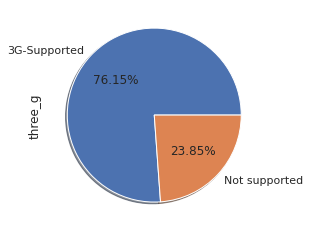

In [ ]:
mobile['three_g'].value_counts().plot(kind='pie',labels=['3G-Supported','Not supported'],autopct='%1.2f%%',shadow=True)


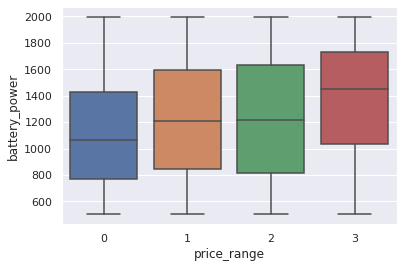

In [ ]:
sns.boxplot(y=mobile['battery_power'],x=mobile['price_range'])


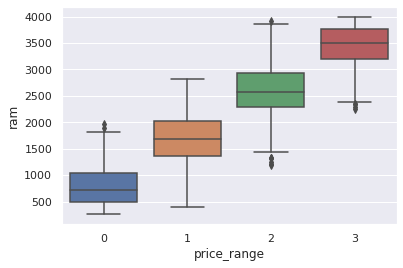

In [6]:
sns.boxplot(y=mobile['ram'],x=mobile['price_range'])

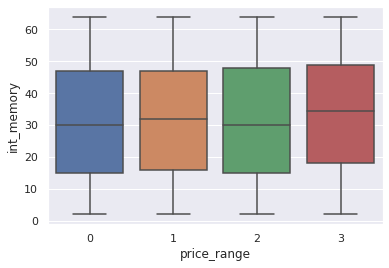

In [ ]:
sns.boxplot(y=mobile['int_memory'],x=mobile['price_range'])


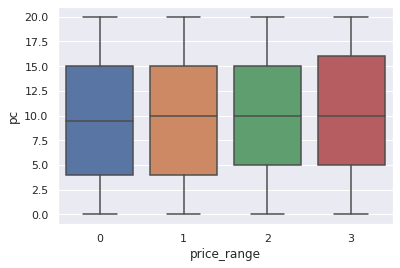

In [ ]:
sns.boxplot(y=mobile['pc'],x=mobile['price_range'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

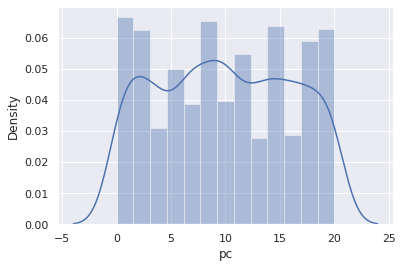

In [ ]:
sns.distplot(mobile['pc'])

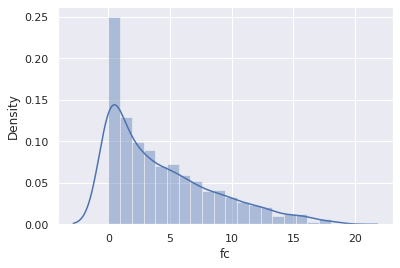

In [ ]:
sns.distplot(mobile['fc'])

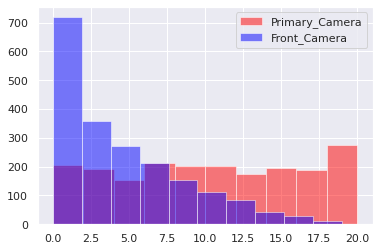

In [ ]:
plt.hist(mobile['pc'],color='red',label='Primary_Camera',alpha=0.5)
plt.hist(mobile['fc'],color='blue',label='Front_Camera',alpha=0.5)
plt.legend()

In [11]:
X = mobile.drop(['price_range'],axis=1)
y = mobile['price_range']

Machine Learning Model Training

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

X_train : (1600, 20)
X_test : (400, 20)
y_train : (1600,)
y_test : (400,)


Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
print('Training model score :',lr.score(X_train,y_train)*100)
print('Testing model score :',lr.score(X_test,y_test)*100)

Training model score : 91.75924509487375
Testing model score : 92.15339010437135


In [20]:
print('Coef_ :\n',lr.coef_)
print('Intercept_ :',lr.intercept_)

Coef_ :
 [ 0.0005133   0.00673802 -0.01126974 -0.02460703 -0.0007209  -0.01647476
  0.00068716 -0.01930948 -0.0009729   0.00217596  0.00081269  0.00027415
  0.00026881  0.00094503  0.00058527  0.00053168  0.00014081  0.02959132
  0.0039384  -0.00931297]
Intercept_ : -1.5430398576766176


In [ ]:
y_test_pred = lr.predict(X_test)
y_test_pred

array([ 2.55800675e-01,  1.74348404e+00,  8.90845293e-01,  2.98762326e+00,
        1.31379876e+00,  1.35430921e+00,  1.68973722e+00,  2.17768535e-01,
        2.50212545e+00,  1.37283866e+00,  2.52930709e-01,  6.40609743e-01,
        1.80097970e+00,  3.21997166e+00,  2.32436910e+00,  2.09494545e+00,
        3.00663957e+00,  3.46643580e+00,  1.17621418e+00,  1.74000827e-01,
        1.19029695e-01,  1.50097735e+00,  6.84166176e-01,  1.86602711e+00,
        1.86614954e-01,  9.60300103e-01,  2.66338410e+00,  2.25221927e+00,
        1.99312891e+00, -1.40631634e-01,  4.75145459e-01, -3.27717910e-01,
        3.10063461e+00,  2.85011797e-01,  1.33494860e+00,  1.31906244e+00,
        2.22191879e+00,  2.75398128e-01,  3.12061029e+00,  2.94840893e-01,
        1.57026805e+00,  2.51836782e+00,  2.02796754e+00, -8.47332025e-02,
        2.38669136e+00,  2.28163547e+00,  1.66864182e+00,  9.23228975e-01,
        2.91124840e+00,  1.02068677e+00,  3.35002127e+00,  1.12627120e+00,
        9.96739197e-03,  

CALCULATING ERROR

In [ ]:
mae = mean_absolute_error(y_test,y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_test_pred)
adj_r2 = 1 - (((1-r2_score) * (X_test.shape[0]-1)) / (X_test.shape[0]-X_test.shape[1]-1))

In [ ]:
print('mean_absolute_error :',mae)
print('mean_sqaured_error :',mse)
print('root_mean_squared_error :',rmse)
print('r2_score :',r2_score)
print('adjusted_r2_score :',adj_r2)

mean_absolute_error : 0.2683009553746578
mean_sqaured_error : 0.10469290211930661
root_mean_squared_error : 0.32356282561398586
r2_score : 0.9215339010437136
adjusted_r2_score : 0.9173932098059148


KNN Algorithm

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.93      0.96      0.94        91
           2       0.89      0.92      0.91        92
           3       1.00      0.92      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



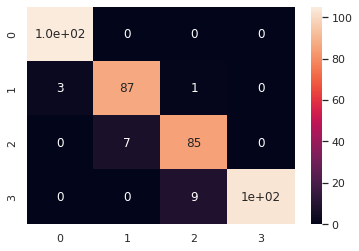

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)

from sklearn.metrics import classification_report,confusion_matrix
y_knn_pred = knn.predict(X_test)

print(classification_report(y_test,y_knn_pred))

matrix=confusion_matrix(y_test,y_knn_pred)
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
print('Training model score :',knn.score(X_train,y_train)*100)
print('Testing model score :',knn.score(X_test,y_test)*100)


Training model score : 95.25
Testing model score : 95.0


In [21]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
y_svm_pred = svm.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



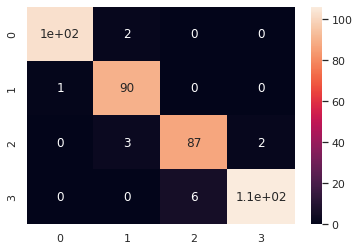

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
matrix=confusion_matrix(y_test,y_svm_pred)
print(classification_report(y_test,y_svm_pred))
sns.heatmap(matrix,annot=True)
plt.show()

In [23]:
print('Training model score :',svm.score(X_train,y_train)*100)
print('Testing model score :',svm.score(X_test,y_test)*100)

Training model score : 95.375
Testing model score : 96.5


Decision* Tree Algorithm

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       105
           1       0.74      0.85      0.79        91
           2       0.77      0.68      0.72        92
           3       0.86      0.89      0.88       112

    accuracy                           0.83       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.83      0.83       400



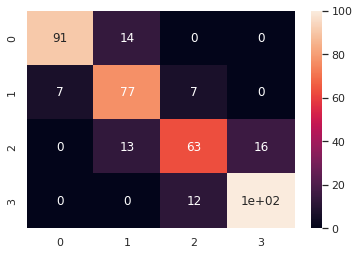

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_dtree_pred = dtree.predict(X_test)
matrix=confusion_matrix(y_test,y_dtree_pred)
print(classification_report(y_test,y_dtree_pred))
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
print('Training model score :',dtree.score(X_train,y_train)*100)
print('Testing model score :',dtree.score(X_test,y_test)*100)

Training model score : 100.0
Testing model score : 83.0


Random Forest

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.85      0.86      0.85        91
           2       0.80      0.84      0.82        92
           3       0.93      0.88      0.91       112

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



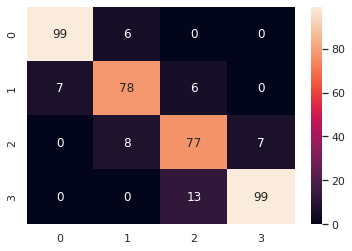

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_rfc_pred = rfc.predict(X_test)
matrix=confusion_matrix(y_test,y_rfc_pred)
print(classification_report(y_test,y_rfc_pred))
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
print('Training model score :',rfc.score(X_train,y_train)*100)
print('Testing model score :',rfc.score(X_test,y_test)*100)

Training model score : 100.0
Testing model score : 88.5


              precision    recall  f1-score   support

           0       0.84      0.72      0.78       105
           1       0.56      0.31      0.40        91
           2       0.43      0.57      0.49        92
           3       0.65      0.79      0.71       112

    accuracy                           0.61       400
   macro avg       0.62      0.60      0.59       400
weighted avg       0.63      0.61      0.61       400



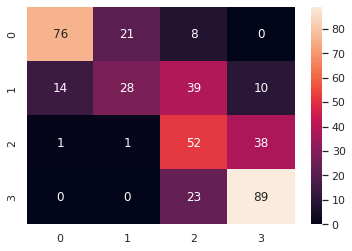

In [ ]:
from sklearn.neural_network import MLPClassifier
mlpc=MLPClassifier()
mlpc.fit(X_train,y_train)
y_mlpc_pred = mlpc.predict(X_test)
matrix=confusion_matrix(y_test,y_mlpc_pred)
print(classification_report(y_test,y_mlpc_pred))
sns.heatmap(matrix,annot=True)
plt.show()

In [ ]:
print('Training model score :',mlpc.score(X_train,y_train)*100)
print('Testing model score :',mlpc.score(X_test,y_test)*100)

Training model score : 68.75
Testing model score : 63.74999999999999


In [ ]:
print('lr    :',lr.score(X_test,y_test)*100)
print('knn   :',knn.score(X_test,y_test)*100)
print('svm   :',svm.score(X_test,y_test)*100)
print('dtree :',dtree.score(X_test,y_test)*100)
print('rfc   :',rfc.score(X_test,y_test)*100)
print('mlp   :',mlpc.score(X_test,y_test)*100)

lr    : 92.15339010437135
knn   : 95.0
svm   : 96.5
dtree : 83.0
rfc   : 89.5
mlp   : 65.5


SVM Plot

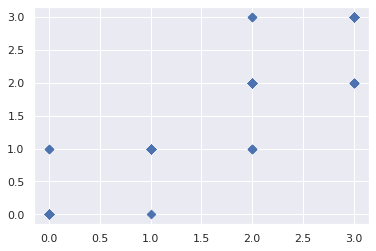

In [26]:
y_svm_pred = svm.predict(X_test)

plt.scatter(y_test,y_svm_pred,marker = 'D')

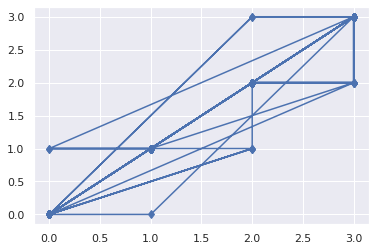

In [27]:
plt.plot(y_test,y_svm_pred,marker='d')

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_svm_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       105
           1       0.95      0.99      0.97        91
           2       0.94      0.95      0.94        92
           3       0.98      0.95      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.97      0.96       400
weighted avg       0.97      0.96      0.97       400



In [ ]:
matrix=confusion_matrix(y_test,y_svm_pred)
print(matrix)
plt.show()

[[103   2   0   0]
 [  1  90   0   0]
 [  0   3  87   2]
 [  0   0   6 106]]


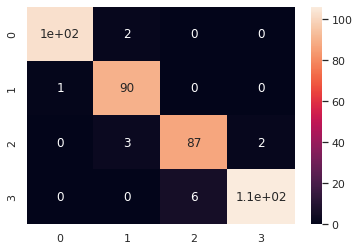

In [ ]:
sns.heatmap(matrix,annot=True)

In [ ]:
mobile_test = pd.read_csv('/content/drive/MyDrive/ML DATA SET/test.csv')
mobile_test.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,9,569,939,3506,10,7,3,1,1,1
6,1718,0,2.4,0,1,0,47,1.0,156,2,3,1283,1374,3873,14,2,10,0,0,0
7,833,0,2.4,1,0,0,62,0.8,111,1,2,1312,1880,1495,7,2,18,0,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,19,556,876,3485,11,9,10,1,1,0
9,1520,0,0.5,0,1,0,25,0.5,171,3,20,52,1009,651,6,0,5,1,0,1


In [ ]:
mobile.reset_index(drop = True).head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mobile_test.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  1000 non-null   bool 
 1   blue           1000 non-null   bool 
 2   clock_speed    1000 non-null   bool 
 3   dual_sim       1000 non-null   bool 
 4   fc             1000 non-null   bool 
 5   four_g         1000 non-null   bool 
 6   int_memory     1000 non-null   bool 
 7   m_dep          1000 non-null   bool 
 8   mobile_wt      1000 non-null   bool 
 9   n_cores        1000 non-null   bool 
 10  pc             1000 non-null   bool 
 11  px_height      1000 non-null   bool 
 12  px_width       1000 non-null   bool 
 13  ram            1000 non-null   bool 
 14  sc_h           1000 non-null   bool 
 15  sc_w           1000 non-null   bool 
 16  talk_time      1000 non-null   bool 
 17  three_g        1000 non-null   bool 
 18  touch_screen   1000 non-null   bool 
 19  wifi   

In [ ]:
pred_svm = svm.predict(mobile_test)
pred_svm

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 3, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

In [ ]:
mobile_test['price_range'] = pred_svm
mobile_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


In [ ]:
mobile_test.to_csv('test_pred_svm.csv')

In [ ]:
mobile_test.to_html('mobile.html')